In [28]:
import torch
import pandas as pd
from torch.utils.data import dataloader

In [29]:
data = pd.read_csv("../data/rec05_small_en_fr.csv")
len(data)

14348

In [30]:
data.head()

,EN,FR
0,i m at a loss for words .,j en perds mes mots .
1,i m at a loss for words .,les mots me manquent .
2,i m at a loss for words .,je ne trouve pas les mots .
3,you re in better shape than i am .,tu es en meilleure forme que moi .
4,you are in my way .,tu es sur mon chemin .


In [31]:
data.sample(3)

,EN,FR
3700,you re the only one for me now .,tu es le seul pour moi maintenant .
5570,he s a bit naive .,il est un peu niais .
8227,you re very understanding .,vous etes fort comprehensives .


In [32]:
print(len(data["EN"][0].split()))
print(data["EN"][0])

8
i m at a loss for words .


In [33]:
data["EN_len"] = data["EN"].apply(lambda x: len(x.split()))
data["FR_len"] = data["FR"].apply(lambda x: len(x.split()))

print(data[["EN_len", "FR_len"]].describe())

             EN_len        FR_len
count  14348.000000  14348.000000
mean       6.095066      6.230276
std        1.443635      1.572335
min        3.000000      2.000000
25%        5.000000      5.000000
50%        6.000000      6.000000
75%        7.000000      7.000000
max        9.000000      9.000000


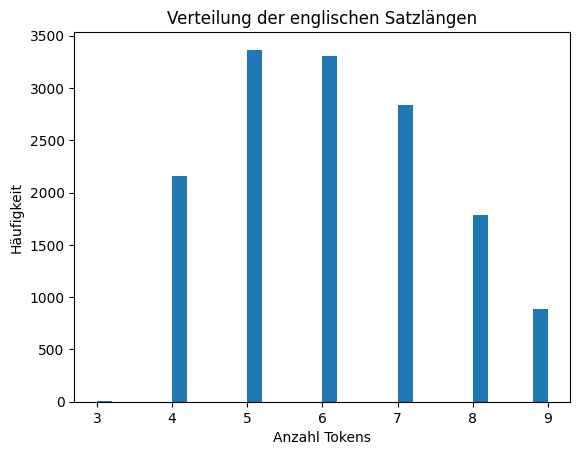

In [34]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(data["EN_len"], bins=30)
plt.title("Verteilung der englischen Satzlängen")
plt.xlabel("Anzahl Tokens")
plt.ylabel("Häufigkeit")
plt.show()

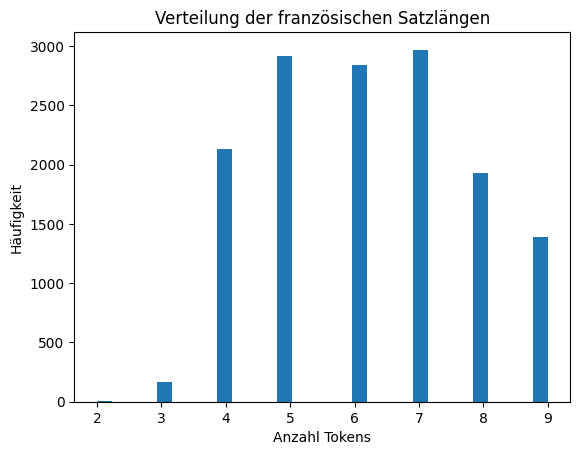

In [35]:
plt.figure()
plt.hist(data["FR_len"], bins=30)
plt.title("Verteilung der französischen Satzlängen")
plt.xlabel("Anzahl Tokens")
plt.ylabel("Häufigkeit")
plt.show()

In [36]:
from collections import Counter

all_EN_tokens = Counter()
all_FR_tokens = Counter()

for sentence in data["EN"]:
    all_EN_tokens.update(sentence.split())
for sentence in data["FR"]:
    all_FR_tokens.update(sentence.split())

print(f"EN len: {len(all_EN_tokens)}")
print(f"FR len: {len(all_FR_tokens)}")

EN len: 3756
FR len: 5386
